## 2. STRATEGY SELECTOR

### description
Este modulo unifica los backtest long y short de los diferentes activos, e identifica aquellas estrategias que estan en ambos periodos; serian aquellas que se han comportado bien historicamente y ademas se estan comportando mejor en el tiempo mas reciente. Posteriormente en cada grupo activo-timeframe-tipo de sistema, se ordenan por mejor BMO-Net Profit-Profit Factor, y la mejor de cada grupo pasará a formar parte del portfolio.

### inputs
- df_ratios_and_equity_select_NQ_long_bkt.pkl
- df_ratios_and_equity_select_NQ_short_bkt.pkl
- df_ratios_and_equity_select_ES_long_bkt.pkl
- df_ratios_and_equity_select_ES_short_bkt.pkl
- df_ratios_and_equity_select_YM_long_bkt.pkl
- df_ratios_and_equity_select_YM_short_bkt.pkl
- df_ratios_and_equity_select_CL_long_bkt.pkl
- df_ratios_and_equity_select_CL_short_bkt.pkl
- df_ratios_and_equity_select_NG_long_bkt.pkl
- df_ratios_and_equity_select_NG_short_bkt.pkl
- df_ratios_and_equity_select_GC_long_bkt.pkl
- df_ratios_and_equity_select_GC_short_bkt.pkl

### outputs
- best_strategies_selection.
- portfolio_result_strategies.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 4
plt.style.use('ggplot')

In [2]:
# only colab environment
#from google.colab import drive  # only colab environment
#drive.mount('/content/drive')

In [3]:
# v_path = '/content/drive/MyDrive/STRATEGY_GENERATOR/' # only colab environment
v_path = '' # local

In [4]:
# leo el fichero de las estrategias preseleccionadas, para cada activo en los baacktests long y short
market = 'CL'
df_cl_long_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_long_bkt.pkl')
df_cl_short_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_short_bkt.pkl')

In [5]:
market = 'GC'
df_gc_long_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_long_bkt.pkl')
df_gc_short_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_short_bkt.pkl')

In [6]:
market = 'NG'
df_ng_long_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_long_bkt.pkl')
df_ng_short_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_short_bkt.pkl')

In [7]:
market = 'YM'
df_ym_long_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_long_bkt.pkl')
df_ym_short_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_short_bkt.pkl')

In [8]:
market = 'ES'
df_es_long_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_long_bkt.pkl')
df_es_short_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_short_bkt.pkl')

In [9]:
market = 'NQ'
df_nq_long_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_long_bkt.pkl')
df_nq_short_bkt = pd.read_pickle(v_path + 'trading_systems_' + market + '/df_ratios_and_equity_select_' + market + '_short_bkt.pkl')

In [10]:
# unificamos los 6 df de cada tipo de backtest en uno solo
df_long_bkt = pd.concat([df_cl_long_bkt, df_gc_long_bkt, df_ng_long_bkt, df_ym_long_bkt, df_es_long_bkt, df_nq_long_bkt], axis=0)
df_short_bkt = pd.concat([df_cl_short_bkt, df_gc_short_bkt, df_ng_short_bkt, df_ym_short_bkt, df_es_short_bkt, df_nq_short_bkt], axis=0)

In [11]:
df_short_bkt # de todos los activos

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,num_trades,bmo,net_profit,profit_factor,sharpe_ratio,max_drawdown,fig_name,positions,trades,indicators
strategy_id,,,,,,,,,,,,,,,,,
13705,CL,5min,trend_short,b_condition_1,b_condition_12,a_condition_7,a_condition_10,137,68.613139,9400.0,1.626249,1.433038,date 2021-11-01 18:15:00 NaN 2021-11-02 08:1...,trading_systems_CL/figures/equity_curve_CL_5mi...,trading_systems_CL/positions/CL_5min_trend_sho...,trading_systems_CL/trades/CL_5min_trend_short_...,trading_systems_CL/indicators/CL_5min_indicato...
22051,CL,15min,trend_long,a_condition_3,a_condition_7,b_condition_5,b_condition_15,127,158.976378,20190.0,1.609970,1.787196,date 2021-11-04 02:45:00 0.0 2021-11-04 08:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...
22053,CL,15min,trend_long,a_condition_11,a_condition_15,b_condition_5,b_condition_10,102,218.529412,22290.0,1.712596,1.504228,date 2021-11-04 11:30:00 0.0 2021-11-04 12:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...
22063,CL,15min,trend_long,a_condition_13,a_condition_15,b_condition_10,b_condition_14,121,181.652893,21980.0,1.646091,1.498023,date 2021-11-04 10:15:00 0.0 2021-11-04 12:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...
22075,CL,15min,trend_long,a_condition_10,a_condition_15,b_condition_5,b_condition_12,72,435.416667,31350.0,2.023172,1.684151,date 2021-11-04 10:30:00 0.0 2021-11-04 14:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65987,NQ,60min,trend_short,b_condition_10,b_condition_15,a_condition_11,a_condition_12,44,749.545455,32980.0,1.682392,1.125645,date 2021-11-16 10:00:00 0.0 2021-11-24 01:...,trading_systems_NQ/figures/equity_curve_NQ_60m...,trading_systems_NQ/positions/NQ_60min_trend_sh...,trading_systems_NQ/trades/NQ_60min_trend_short...,trading_systems_NQ/indicators/NQ_60min_indicat...
66029,NQ,60min,trend_short,b_condition_2,b_condition_7,a_condition_12,a_condition_16,49,1100.612245,53930.0,1.801218,1.487622,date 2021-11-12 11:00:00 0.0 2021-11-16 11:...,trading_systems_NQ/figures/equity_curve_NQ_60m...,trading_systems_NQ/positions/NQ_60min_trend_sh...,trading_systems_NQ/trades/NQ_60min_trend_short...,trading_systems_NQ/indicators/NQ_60min_indicat...
66045,NQ,60min,trend_short,b_condition_1,b_condition_7,a_condition_3,a_condition_14,44,948.068182,41715.0,1.733193,1.381702,date 2021-11-12 11:00:00 0.0 2021-11-16 10:...,trading_systems_NQ/figures/equity_curve_NQ_60m...,trading_systems_NQ/positions/NQ_60min_trend_sh...,trading_systems_NQ/trades/NQ_60min_trend_short...,trading_systems_NQ/indicators/NQ_60min_indicat...


In [12]:
# unimos las columnas market	timeframe	system_type	in_condition_1	in_condition_2	out_condition_1	out_condition_2, en un unico identificador
df_long_bkt['id'] = df_long_bkt['market'] + '_' + df_long_bkt['timeframe'] + '_' + df_long_bkt['system_type'] + '_' + df_long_bkt['in_condition_1'] + '_' + df_long_bkt['in_condition_2'] + '_' + df_long_bkt['out_condition_1'] + '_' + df_long_bkt['out_condition_2']
df_short_bkt['id'] = df_short_bkt['market'] + '_' + df_short_bkt['timeframe'] + '_' + df_short_bkt['system_type'] + '_' + df_short_bkt['in_condition_1'] + '_' + df_short_bkt['in_condition_2'] + '_' + df_short_bkt['out_condition_1'] + '_' + df_short_bkt['out_condition_2']

In [13]:
# convertimos en listas para hacer la interseccion
list_long_bkt = df_long_bkt['id'].tolist()
list_short_bkt = df_short_bkt['id'].tolist()

list_id_intersection = list(set(list_long_bkt) & set(list_short_bkt))

In [14]:
# crearemos un df con las estrategias que se encuentran en la interseccion de ambos backtests. 
df_intersection = df_short_bkt[df_short_bkt['id'].isin(list_id_intersection)]
df_intersection

# df_intersection contiene las estrategias que se han comportado aceptable historicamente (pf>1.2- backtest long con > 120 trades/año)
# y que ademas se estan comportando bien en el tiempo mas reciente (pf>1.5- backtest short con > 10 trades/mes)

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,num_trades,bmo,net_profit,profit_factor,sharpe_ratio,max_drawdown,fig_name,positions,trades,indicators,id
strategy_id,,,,,,,,,,,,,,,,,,
22995,CL,15min,trend_long,a_condition_3,a_condition_11,b_condition_4,b_condition_14,77,334.935065,25790.0,1.913244,1.652973,date 2021-11-04 02:45:00 0.0 2021-11-04 10:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...,CL_15min_trend_long_a_condition_3_a_condition_...
24490,CL,15min,trend_long,a_condition_3,a_condition_11,b_condition_5,b_condition_14,77,334.935065,25790.0,1.913244,1.652973,date 2021-11-04 02:45:00 0.0 2021-11-04 10:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...,CL_15min_trend_long_a_condition_3_a_condition_...
25123,CL,15min,trend_long,a_condition_3,a_condition_13,b_condition_4,b_condition_14,73,308.493151,22520.0,1.740059,1.432794,date 2021-11-04 02:45:00 0.0 2021-11-04 10:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...,CL_15min_trend_long_a_condition_3_a_condition_...
26555,CL,15min,trend_long,a_condition_3,a_condition_11,b_condition_6,b_condition_14,77,334.935065,25790.0,1.913244,1.652973,date 2021-11-04 02:45:00 0.0 2021-11-04 10:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...,CL_15min_trend_long_a_condition_3_a_condition_...
26646,CL,15min,trend_long,a_condition_3,a_condition_13,b_condition_5,b_condition_14,73,308.493151,22520.0,1.740059,1.432794,date 2021-11-04 02:45:00 0.0 2021-11-04 10:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...,CL_15min_trend_long_a_condition_3_a_condition_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48525,YM,60min,trend_long,a_condition_13,a_condition_15,b_condition_1,b_condition_13,45,236.888889,10660.0,1.721733,1.345822,date 2021-11-12 10:00:00 0.0 2021-11-15 11:...,trading_systems_YM/figures/equity_curve_YM_60m...,trading_systems_YM/positions/YM_60min_trend_lo...,trading_systems_YM/trades/YM_60min_trend_long_...,trading_systems_YM/indicators/YM_60min_indicat...,YM_60min_trend_long_a_condition_13_a_condition...
56103,YM,60min,trend_short,b_condition_10,b_condition_13,a_condition_7,a_condition_13,53,279.433962,14810.0,1.790077,1.471180,date 2021-11-11 18:00:00 0.0 2021-11-12 11:...,trading_systems_YM/figures/equity_curve_YM_60m...,trading_systems_YM/positions/YM_60min_trend_sh...,trading_systems_YM/trades/YM_60min_trend_short...,trading_systems_YM/indicators/YM_60min_indicat...,YM_60min_trend_short_b_condition_10_b_conditio...
32335,ES,15min,trend_long,a_condition_1,a_condition_16,b_condition_1,b_condition_14,56,222.321429,12450.0,1.641753,1.221863,date 2021-11-04 17:15:00 0.0 2021-11-05 10:...,trading_systems_ES/figures/equity_curve_ES_15m...,trading_systems_ES/positions/ES_15min_trend_lo...,trading_systems_ES/trades/ES_15min_trend_long_...,trading_systems_ES/indicators/ES_15min_indicat...,ES_15min_trend_long_a_condition_1_a_condition_...


In [15]:
# en este df seleccionaremos las mejores estrategias para cada market-timeframe-system_type; ya que queremos que haya estrategias de todos los tipos y timeframes en el portfolio
# para ello primero agruparemos por market-timeframe-system_type
df_intersection_grouped = df_intersection.groupby(['market', 'timeframe', 'system_type'])

In [16]:
# de cada grupo elegiremos la estrategia con mejor bmo,	net_profit y profit_factor - en el backtest reciente, y las guardaremos en un df
df_intersection_grouped_best_strategy = df_intersection_grouped.apply(lambda x: x.sort_values(['bmo', 'net_profit', 'profit_factor'], ascending=False).iloc[0])
df_intersection_grouped_best_strategy


market timeframe  system_type  in_condition_1  \
market timeframe system_type                                                 
CL     15min     trend_long      CL     15min   trend_long   a_condition_3   
       60min     trend_long      CL     60min   trend_long   a_condition_2   
ES     15min     trend_long      ES     15min   trend_long   a_condition_1   
GC     15min     trend_long      GC     15min   trend_long   a_condition_3   
       60min     trend_long      GC     60min   trend_long   a_condition_1   
NG     15min     trend_short     NG     15min  trend_short   b_condition_1   
       60min     trend_short     NG     60min  trend_short  b_condition_11   
NQ     15min     trend_long      NQ     15min   trend_long   a_condition_3   
YM     60min     trend_long      YM     60min   trend_long  a_condition_13   
                 trend_short     YM     60min  trend_short  b_condition_10   

                              in_condition_2 out_condition_1 out_condition_2  \
market timeframe system_type                                                   
CL     15min     trend_long   a_condition_11   b_condition_4  b_condition_14   
       60min     trend_long    a_condition_9  b_condition_12  b_condition_16   
ES     15min     trend_long   a_condition_16   b_condition_1  b_condition_14   
GC     15min     trend_long   a_condition_15   b_condition_6  b_condition_16   
       60min     trend_long    a_condition_9  b_condition_10  b_condition_15   
NG     15min     trend_short  b_condition_16   a_condition_6  a_condition_14   
       60min     trend_short  b_condition_13   a_condition_9  a_condition_13   
NQ     15min     trend_long   a_condition_16   b_condition_3  b_condition_12   
YM     60min     trend_long   a_condition_15   b_condition_1  b_condition_13   
                 trend_short  b_condition_13   a_condition_7  a_condition_13   

                              num_trades         bmo  net_profit  \
market timeframe system_type                                       
CL     15min     trend_long           77  334.935065     25790.0   
       60min     trend_long           44  607.500000     26730.0   
ES     15min     trend_long           56  222.321429     12450.0   
GC     15min     trend_long           50  559.000000     27950.0   
       60min     trend_long           41  376.829268     15450.0   
NG     15min     trend_short          49  348.367347     17070.0   
       60min     trend_short          58  259.137931     15030.0   
NQ     15min     trend_long           47  697.659574     32790.0   
YM     60min     trend_long           45  236.888889     10660.0   
                 trend_short          53  279.433962     14810.0   

                              profit_factor  sharpe_ratio  \
market timeframe system_type                                
CL     15min     trend_long        1.913244      1.652973   
       60min     trend_long        1.918241      1.524507   
ES     15min     trend_long        1.641753      1.221863   
GC     15min     trend_long        3.600000      2.666303   
       60min     trend_long        2.452068      1.715721   
NG     15min     trend_short       1.787362      1.449025   
       60min     trend_short       1.815518      1.624535   
NQ     15min     trend_long        1.713835      1.319438   
YM     60min     trend_long        1.721733      1.345822   
                 trend_short       1.790077      1.471180   

                                                                   max_drawdown  \
market timeframe system_type                                                      
CL     15min     trend_long   date
2021-11-04 02:45:00    0.0
2021-11-04 10:...   
       60min     trend_long   date
2021-11-11 13:00:00    0.0
2021-11-12 05:...   
ES     15min     trend_long   date
2021-11-04 17:15:00    0.0
2021-11-05 10:...   
GC     15min     trend_long   date
2021-11-09 10:15:00    0.0
2021-11-10 10:...   
       60min     trend_long   date
2021-11-14 21:00:00    0.0
2021-11-16 10:...   


In [17]:
# eliminamos los indices que esta repetido
df_intersection_grouped_best_strategy.reset_index(inplace=True, drop=True)
# y creamos un nuevo indice de 1 a n
df_intersection_grouped_best_strategy.index = range(1, len(df_intersection_grouped_best_strategy) + 1)

In [18]:
best_strategies_selection = df_intersection_grouped_best_strategy.copy()
# lo guardamos
best_strategies_selection.to_pickle(v_path + 'best_strategies_selection.pkl')

In [19]:
best_strategies_selection

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,num_trades,bmo,net_profit,profit_factor,sharpe_ratio,max_drawdown,fig_name,positions,trades,indicators,id
1,CL,15min,trend_long,a_condition_3,a_condition_11,b_condition_4,b_condition_14,77,334.935065,25790.0,1.913244,1.652973,date 2021-11-04 02:45:00 0.0 2021-11-04 10:...,trading_systems_CL/figures/equity_curve_CL_15m...,trading_systems_CL/positions/CL_15min_trend_lo...,trading_systems_CL/trades/CL_15min_trend_long_...,trading_systems_CL/indicators/CL_15min_indicat...,CL_15min_trend_long_a_condition_3_a_condition_...
2,CL,60min,trend_long,a_condition_2,a_condition_9,b_condition_12,b_condition_16,44,607.500000,26730.0,1.918241,1.524507,date 2021-11-11 13:00:00 0.0 2021-11-12 05:...,trading_systems_CL/figures/equity_curve_CL_60m...,trading_systems_CL/positions/CL_60min_trend_lo...,trading_systems_CL/trades/CL_60min_trend_long_...,trading_systems_CL/indicators/CL_60min_indicat...,CL_60min_trend_long_a_condition_2_a_condition_...
3,ES,15min,trend_long,a_condition_1,a_condition_16,b_condition_1,b_condition_14,56,222.321429,12450.0,1.641753,1.221863,date 2021-11-04 17:15:00 0.0 2021-11-05 10:...,trading_systems_ES/figures/equity_curve_ES_15m...,trading_systems_ES/positions/ES_15min_trend_lo...,trading_systems_ES/trades/ES_15min_trend_long_...,trading_systems_ES/indicators/ES_15min_indicat...,ES_15min_trend_long_a_condition_1_a_condition_...
4,GC,15min,trend_long,a_condition_3,a_condition_15,b_condition_6,b_condition_16,50,559.000000,27950.0,3.600000,2.666303,date 2021-11-09 10:15:00 0.0 2021-11-10 10:...,trading_systems_GC/figures/equity_curve_GC_15m...,trading_systems_GC/positions/GC_15min_trend_lo...,trading_systems_GC/trades/GC_15min_trend_long_...,trading_systems_GC/indicators/GC_15min_indicat...,GC_15min_trend_long_a_condition_3_a_condition_...
5,GC,60min,trend_long,a_condition_1,a_condition_9,b_condition_10,b_condition_15,41,376.829268,15450.0,2.452068,1.715721,date 2021-11-14 21:00:00 0.0 2021-11-16 10:...,trading_systems_GC/figures/equity_curve_GC_60m...,trading_systems_GC/positions/GC_60min_trend_lo...,trading_systems_GC/trades/GC_60min_trend_long_...,trading_systems_GC/indicators/GC_60min_indicat...,GC_60min_trend_long_a_condition_1_a_condition_...
6,NG,15min,trend_short,b_condition_1,b_condition_16,a_condition_6,a_condition_14,49,348.367347,17070.0,1.787362,1.449025,date 2021-11-04 08:15:00 0.0 2021-11-05 07:...,trading_systems_NG/figures/equity_curve_NG_15m...,trading_systems_NG/positions/NG_15min_trend_sh...,trading_systems_NG/trades/NG_15min_trend_short...,trading_systems_NG/indicators/NG_15min_indicat...,NG_15min_trend_short_b_condition_1_b_condition...
7,NG,60min,trend_short,b_condition_11,b_condition_13,a_condition_9,a_condition_13,58,259.137931,15030.0,1.815518,1.624535,date 2021-11-11 11:00:00 0.0 2021-11-12 10:...,trading_systems_NG/figures/equity_curve_NG_60m...,trading_systems_NG/positions/NG_60min_trend_sh...,trading_systems_NG/trades/NG_60min_trend_short...,trading_systems_NG/indicators/NG_60min_indicat...,NG_60min_trend_short_b_condition_11_b_conditio...
8,NQ,15min,trend_long,a_condition_3,a_condition_16,b_condition_3,b_condition_12,47,697.659574,32790.0,1.713835,1.319438,date 2021-11-04 08:30:00 0.0 2021-11-05 02:...,trading_systems_NQ/figures/equity_curve_NQ_15m...,trading_systems_NQ/positions/NQ_15min_trend_lo...,trading_systems_NQ/trades/NQ_15min_trend_long_...,trading_systems_NQ/indicators/NQ_15min_indicat...,NQ_15min_trend_long_a_condition_3_a_condition_...
9,YM,60min,trend_long,a_condition_13,a_condition_15,b_condition_1,b_condition_13,45,236.888889,10660.0,1.721733,1.345822,date 2021-11-12 10:00:00 0.0 2021-11-15 11:...,trading_systems_YM/figures/equity_curve_YM_60m...,trading_systems_YM/positions/YM_60min_trend_lo...,trading_systems_YM/trades/YM_60min_trend_long_...,trading_systems_YM/indicators/YM_60min_indicat...,YM_60min_trend_long_a_condition_13_a_condition...
10,YM,60min,trend_short,b_condition_10,b_cond

In [20]:
# definimos el df portfolio_result donde incluiremos las estrategias con su correspondiente leyenda
# eliminamos las columnas  max_drawdown, fig_name, positions, trades, indicators, id
portfolio_result = df_intersection_grouped_best_strategy.copy()
portfolio_result.drop(['max_drawdown', 'fig_name', 'positions', 'trades', 'indicators', 'id'], axis=1, inplace=True)

In [21]:
# creamos la leyenda de condiciones que se usaron en la generacion de estrategias

portfolio_result = portfolio_result.replace(to_replace='a_condition_1', value='three_bars_up')
portfolio_result = portfolio_result.replace(to_replace='a_condition_2', value='two_bars_up')
portfolio_result = portfolio_result.replace(to_replace='a_condition_3', value='close > bb_upband_20__2')
portfolio_result = portfolio_result.replace(to_replace='a_condition_4', value='close > max_6')
portfolio_result = portfolio_result.replace(to_replace='a_condition_5', value='close > max_12')
portfolio_result = portfolio_result.replace(to_replace='a_condition_6', value='close > max_200')
portfolio_result = portfolio_result.replace(to_replace='a_condition_7', value='close > ema_6')
portfolio_result = portfolio_result.replace(to_replace='a_condition_8', value='close > ema_26')
portfolio_result = portfolio_result.replace(to_replace='a_condition_9', value='close > sma_12')
portfolio_result = portfolio_result.replace(to_replace='a_condition_10', value='close > sma_60')
portfolio_result = portfolio_result.replace(to_replace='a_condition_11', value='close > (close.shift(2) + 1.3 * atr_14)')
portfolio_result = portfolio_result.replace(to_replace='a_condition_12', value='close > (close.shift(2) + 2 * atr_14)')
portfolio_result = portfolio_result.replace(to_replace='a_condition_13', value='close > (close.shift(2) + 1.3 * atr_28)')
portfolio_result = portfolio_result.replace(to_replace='a_condition_14', value='close > (close.shift(2) + 2 * atr_28)')
portfolio_result = portfolio_result.replace(to_replace='a_condition_15', value='close > (close.shift(2) + 1.3 * atr_200)')
portfolio_result = portfolio_result.replace(to_replace='a_condition_16', value='close > (close.shift(2) + 2 * atr_200)')

portfolio_result = portfolio_result.replace(to_replace='b_condition_1', value='three_bars_down')
portfolio_result = portfolio_result.replace(to_replace='b_condition_2', value='two_bars_down')
portfolio_result = portfolio_result.replace(to_replace='b_condition_3', value='close < bb_downband_20__2')
portfolio_result = portfolio_result.replace(to_replace='b_condition_4', value='close < min_6')
portfolio_result = portfolio_result.replace(to_replace='b_condition_5', value='close < min_12')
portfolio_result = portfolio_result.replace(to_replace='b_condition_6', value='close < min_200')
portfolio_result = portfolio_result.replace(to_replace='b_condition_7', value='close < ema_6')
portfolio_result = portfolio_result.replace(to_replace='b_condition_8', value='close < ema_26')
portfolio_result = portfolio_result.replace(to_replace='b_condition_9', value='close < sma_12')
portfolio_result = portfolio_result.replace(to_replace='b_condition_10', value='close < sma_60')
portfolio_result = portfolio_result.replace(to_replace='b_condition_11', value='close < (close.shift(2) - 1.3 * atr_14)')
portfolio_result = portfolio_result.replace(to_replace='b_condition_12', value='close < (close.shift(2) - 2 * atr_14)')
portfolio_result = portfolio_result.replace(to_replace='b_condition_13', value='close < (close.shift(2) - 1.3 * atr_28)')
portfolio_result = portfolio_result.replace(to_replace='b_condition_14', value='close < (close.shift(2) - 2 * atr_28)')
portfolio_result = portfolio_result.replace(to_replace='b_condition_15', value='close < (close.shift(2) - 1.3 * atr_200)')
portfolio_result = portfolio_result.replace(to_replace='b_condition_16', value='close < (close.shift(2) - 2 * atr_200)')


In [22]:
# Guardamos portfolio_result en un csv
portfolio_result.to_csv('portfolio_robotrader.csv')
portfolio_result # los ratios mostrados son del backtest reciente)

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,num_trades,bmo,net_profit,profit_factor,sharpe_ratio
1,CL,15min,trend_long,close > bb_upband_20__2,close > (close.shift(2) + 1.3 * atr_14),close < min_6,close < (close.shift(2) - 2 * atr_28),77,334.935065,25790.0,1.913244,1.652973
2,CL,60min,trend_long,two_bars_up,close > sma_12,close < (close.shift(2) - 2 * atr_14),close < (close.shift(2) - 2 * atr_200),44,607.500000,26730.0,1.918241,1.524507
3,ES,15min,trend_long,three_bars_up,close > (close.shift(2) + 2 * atr_200),three_bars_down,close < (close.shift(2) - 2 * atr_28),56,222.321429,12450.0,1.641753,1.221863
4,GC,15min,trend_long,close > bb_upband_20__2,close > (close.shift(2) + 1.3 * atr_200),close < min_200,close < (close.shift(2) - 2 * atr_200),50,559.000000,27950.0,3.600000,2.666303
5,GC,60min,trend_long,three_bars_up,close > sma_12,close < sma_60,close < (close.shift(2) - 1.3 * atr_200),41,376.829268,15450.0,2.452068,1.715721
6,NG,15min,trend_short,three_bars_down,close < (close.shift(2) - 2 * atr_200),close > max_200,close > (close.shift(2) + 2 * atr_28),49,348.367347,17070.0,1.787362,1.449025
7,NG,60min,trend_short,close < (close.shift(2) - 1.3 * atr_14),close < (close.shift(2) - 1.3 * atr_28),close > sma_12,close > (close.shift(2) + 1.3 * atr_28),58,259.137931,15030.0,1.815518,1.624535
8,NQ,15min,trend_long,close > bb_upband_20__2,close > (close.shift(2) + 2 * atr_200),close < bb_downband_20__2,close < (close.shift(2) - 2 * atr_14),47,697.659574,32790.0,1.713835,1.319438
9,YM,60min,trend_long,close > (close.shift(2) + 1.3 * atr_28),close > (close.shift(2) + 1.3 * atr_200),three_bars_down,close < (close.shift(2) - 1.3 * atr_28),45,236.888889,10660.0,1.721733,1.345822
10,YM,60min,trend_short,close < sma_60,close < (close.shift(2) - 1.3 * atr_28),close > ema_6,close > (close.shift(2) + 1.3 * atr_28),53,279.433962,14810.0,1.790077,1.471180


trading_systems_CL/figures_short_bkt/equity_curve_CL_15min_trend_long_a_condition_3_a_condition_11_b_condition_4_b_condition_14.png


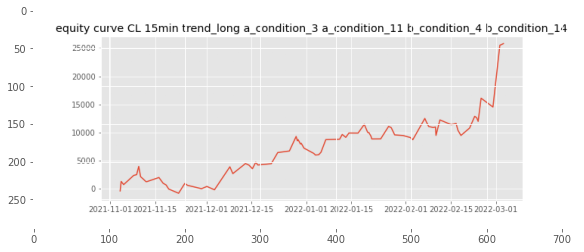

date
2021-11-04 02:45:00     -380.0
2021-11-04 10:15:00     1690.0
2021-11-05 05:00:00     -560.0
2021-11-08 07:45:00     1630.0
2021-11-09 05:45:00      140.0
                        ...   
2022-02-23 12:00:00     -640.0
2022-02-24 10:00:00     4120.0
2022-02-28 02:30:00    -1570.0
2022-03-02 06:00:00    10970.0
2022-03-03 08:45:00      290.0
Name: trades, Length: 77, dtype: float64
trading_systems_CL/figures_short_bkt/equity_curve_CL_60min_trend_long_a_condition_2_a_condition_9_b_condition_12_b_condition_16.png


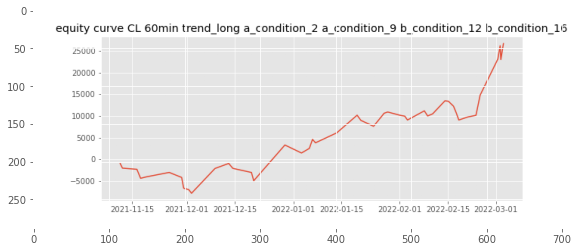

date
2021-11-11 13:00:00    -960.0
2021-11-12 05:00:00   -1100.0
2021-11-16 10:00:00    -270.0
2021-11-17 12:00:00   -2080.0
2021-11-19 05:00:00     340.0
2021-11-25 20:00:00    1020.0
2021-11-29 11:00:00   -1160.0
2021-11-30 01:00:00   -2470.0
2021-12-01 13:00:00    -370.0
2021-12-02 08:00:00    -820.0
2021-12-09 04:00:00    5730.0
2021-12-13 04:00:00    1170.0
2021-12-14 09:00:00   -1140.0
2021-12-19 19:00:00    -950.0
2021-12-20 11:00:00   -1910.0
2021-12-29 13:00:00    8260.0
2022-01-03 09:00:00   -1850.0
2022-01-05 16:00:00    1070.0
2022-01-06 14:00:00    2080.0
2022-01-07 11:00:00    -790.0
2022-01-13 16:00:00    2310.0
2022-01-19 14:00:00    4080.0
2022-01-20 16:00:00   -1200.0
2022-01-24 09:00:00   -1370.0
2022-01-27 11:00:00    3020.0
2022-01-28 12:00:00     280.0
2022-02-01 05:00:00    -780.0
2022-02-02 11:00:00    -170.0
2022-02-03 06:00:00    -900.0
2022-02-08 04:00:00    2120.0
2022-02-09 03:00:00   -1180.0
2022-02-10 14:00:00     480.0
2022-02-14 04:00:00    3020.0
2022-

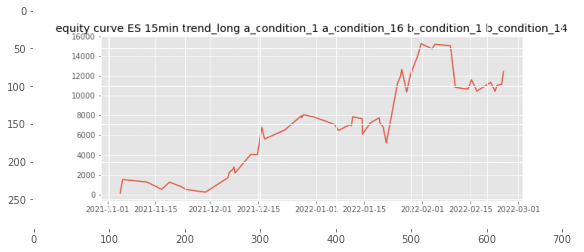

date
2021-11-04 17:15:00      2.75
2021-11-05 10:45:00     27.75
2021-11-12 12:15:00     -5.00
2021-11-15 09:00:00     -9.75
2021-11-16 19:15:00     -5.25
2021-11-19 03:45:00     14.75
2021-11-22 10:15:00     -8.75
2021-11-23 22:30:00     -6.00
2021-11-29 15:00:00     -5.50
2021-12-02 12:15:00     12.75
2021-12-06 04:00:00     16.25
2021-12-06 14:15:00     11.00
2021-12-07 13:45:00      5.75
2021-12-07 23:15:00      5.00
2021-12-08 06:30:00    -12.00
2021-12-12 20:45:00     37.50
2021-12-14 19:30:00     -0.25
2021-12-16 02:15:00     55.00
2021-12-16 21:45:00    -23.50
2021-12-22 18:30:00     18.00
2021-12-27 14:30:00     28.75
2021-12-27 18:00:00     -3.50
2021-12-28 05:00:00      5.75
2021-12-31 05:15:00     -4.50
2022-01-04 20:15:00    -11.25
2022-01-06 08:15:00     -4.00
2022-01-07 11:45:00    -12.00
2022-01-10 22:15:00     12.00
2022-01-11 06:45:00     -2.50
2022-01-11 15:00:00     18.25
2022-01-14 10:00:00     -4.25
2022-01-14 12:30:00    -31.00
2022-01-16 18:30:00     22.75
2022-

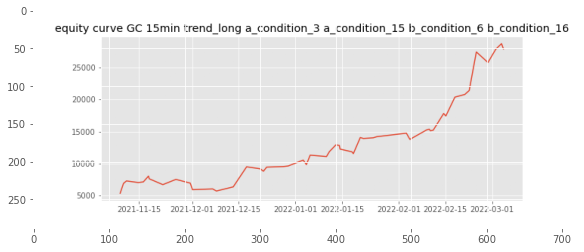

date
2021-11-09 10:15:00    53.6
2021-11-10 10:15:00    15.4
2021-11-11 07:30:00     3.9
2021-11-14 20:45:00    -2.5
2021-11-16 09:15:00     1.0
2021-11-17 22:15:00     9.1
2021-11-18 04:00:00    -4.3
2021-11-22 05:45:00    -9.1
2021-11-26 03:45:00     8.2
2021-11-30 10:45:00    -5.8
2021-12-01 03:30:00   -10.3
2021-12-07 04:15:00     1.2
2021-12-08 07:15:00    -3.3
2021-12-13 08:30:00     6.5
2021-12-17 09:00:00    31.4
2021-12-21 10:15:00    -3.1
2021-12-22 10:00:00    -3.8
2021-12-23 09:15:00     6.4
2021-12-28 09:15:00     0.9
2021-12-29 20:15:00     0.9
2022-01-03 08:15:00     9.2
2022-01-04 07:30:00    -7.0
2022-01-05 10:30:00    14.7
2022-01-10 08:00:00    -2.2
2022-01-11 05:00:00     7.7
2022-01-13 03:45:00    10.6
2022-01-14 04:15:00    -0.8
2022-01-14 09:45:00    -5.8
2022-01-17 22:45:00    -4.2
2022-01-18 09:30:00    -2.9
2022-01-20 11:30:00    25.2
2022-01-21 10:15:00    -1.5
2022-01-24 09:00:00     1.1
2022-01-25 10:30:00     1.7
2022-02-03 07:30:00     5.5
2022-02-04 08:4

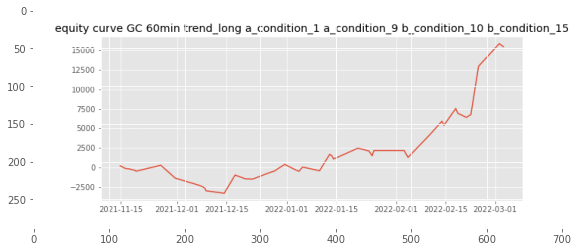

date
2021-11-14 21:00:00     2.2
2021-11-16 10:00:00    -3.5
2021-11-17 09:00:00    -0.4
2021-11-19 02:00:00    -1.9
2021-11-19 08:00:00    -1.1
2021-11-26 09:00:00     7.6
2021-11-30 11:00:00   -16.4
2021-12-07 09:00:00    -9.4
2021-12-08 08:00:00    -2.0
2021-12-08 22:00:00    -1.9
2021-12-09 04:00:00    -2.9
2021-12-14 08:00:00    -3.2
2021-12-17 10:00:00    23.3
2021-12-20 07:00:00    -4.8
2021-12-22 09:00:00    -0.4
2021-12-27 13:00:00     8.9
2021-12-28 10:00:00     1.1
2021-12-31 11:00:00     8.8
2022-01-03 08:00:00    -6.6
2022-01-04 12:00:00    -2.2
2022-01-05 12:00:00     5.4
2022-01-10 08:00:00    -4.7
2022-01-13 05:00:00    21.1
2022-01-13 20:00:00    -2.2
2022-01-14 07:00:00    -3.9
2022-01-21 04:00:00    13.8
2022-01-24 07:00:00    -3.5
2022-01-25 05:00:00    -6.1
2022-01-25 17:00:00     6.7
2022-02-03 06:00:00     0.0
2022-02-04 09:00:00    -8.8
2022-02-10 14:00:00    29.2
2022-02-13 23:00:00    17.0
2022-02-14 13:00:00    -5.2
2022-02-17 21:00:00    21.5
2022-02-18 11:0

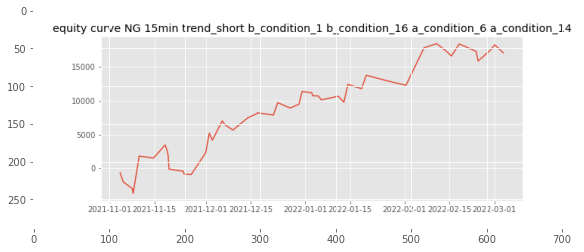

date
2021-11-04 08:15:00   -0.066
2021-11-05 07:30:00   -0.134
2021-11-08 02:15:00   -0.096
2021-11-08 09:30:00   -0.071
2021-11-10 06:45:00    0.549
2021-11-14 18:15:00   -0.028
2021-11-18 09:00:00    0.193
2021-11-19 02:30:00   -0.101
2021-11-19 08:00:00   -0.069
2021-11-19 13:45:00   -0.187
2021-11-24 00:45:00   -0.031
2021-11-24 05:30:00   -0.041
2021-11-26 11:30:00   -0.009
2021-12-01 00:45:00    0.325
2021-12-02 03:00:00    0.287
2021-12-03 02:15:00   -0.104
2021-12-06 03:45:00    0.285
2021-12-07 02:30:00   -0.061
2021-12-09 12:00:00   -0.074
2021-12-14 02:15:00    0.180
2021-12-17 01:30:00    0.065
2021-12-17 03:15:00    0.010
2021-12-21 07:15:00   -0.027
2021-12-22 02:30:00   -0.008
2021-12-23 11:00:00    0.185
2021-12-27 08:30:00   -0.079
2021-12-30 01:45:00    0.055
2021-12-31 01:30:00    0.189
2022-01-03 02:15:00   -0.019
2022-01-03 09:30:00   -0.045
2022-01-05 02:00:00   -0.001
2022-01-06 02:15:00   -0.059
2022-01-11 08:00:00    0.054
2022-01-13 02:15:00   -0.089
2022-01-1

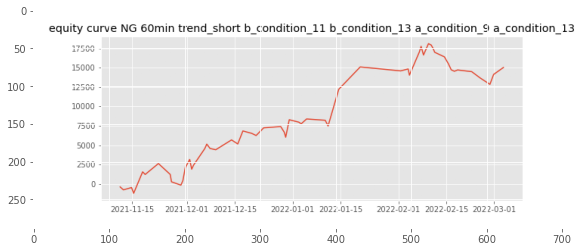

date
2021-11-11 11:00:00   -0.040
2021-11-12 10:00:00   -0.038
2021-11-14 19:00:00    0.030
2021-11-15 10:00:00   -0.074
2021-11-18 01:00:00    0.277
2021-11-18 19:00:00   -0.034
2021-11-22 16:00:00    0.141
2021-11-24 07:00:00   -0.066
2021-11-26 03:00:00   -0.075
2021-11-26 12:00:00   -0.095
2021-11-29 06:00:00   -0.043
2021-11-29 20:00:00    0.058
2021-11-30 13:00:00    0.168
2021-12-01 20:00:00    0.106
2021-12-02 10:00:00   -0.126
2021-12-02 23:00:00    0.052
2021-12-06 06:00:00    0.214
2021-12-06 20:00:00    0.058
2021-12-07 19:00:00   -0.056
2021-12-09 11:00:00   -0.017
2021-12-14 02:00:00    0.127
2021-12-14 14:00:00   -0.014
2021-12-15 22:00:00   -0.038
2021-12-17 10:00:00    0.168
2021-12-20 00:00:00   -0.031
2021-12-21 07:00:00   -0.028
2021-12-23 12:00:00    0.099
2021-12-28 12:00:00    0.017
2021-12-29 13:00:00   -0.074
2021-12-29 23:00:00   -0.064
2021-12-31 00:00:00    0.226
2022-01-02 20:00:00   -0.032
2022-01-03 12:00:00   -0.021
2022-01-05 02:00:00    0.063
2022-01-1

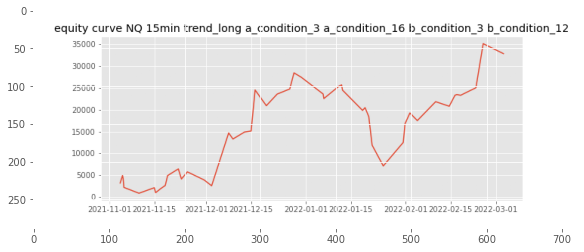

date
2021-11-04 08:30:00    161.50
2021-11-05 02:15:00     86.00
2021-11-05 06:30:00    -32.75
2021-11-05 12:30:00   -103.25
2021-11-10 04:45:00    -66.75
2021-11-14 22:45:00     63.25
2021-11-15 09:00:00    -56.75
2021-11-16 21:30:00     45.00
2021-11-18 08:45:00     37.75
2021-11-19 02:15:00    112.75
2021-11-22 10:15:00     76.25
2021-11-23 09:15:00   -115.75
2021-11-25 05:15:00     82.00
2021-11-30 09:45:00    -92.00
2021-12-02 18:15:00    -67.00
2021-12-08 01:15:00    603.50
2021-12-09 09:15:00    -69.25
2021-12-12 23:45:00     80.00
2021-12-15 00:45:00     11.25
2021-12-16 06:15:00    468.75
2021-12-19 18:00:00   -179.50
2021-12-23 02:30:00    132.50
2021-12-27 00:30:00     58.50
2021-12-28 08:00:00    184.00
2021-12-30 14:15:00    -50.00
2022-01-06 09:15:00   -191.50
2022-01-06 14:45:00    -52.25
2022-01-11 08:00:00    142.75
2022-01-12 02:45:00     13.75
2022-01-12 09:45:00    -60.00
2022-01-18 15:00:00   -231.50
2022-01-19 09:45:00     31.25
2022-01-20 13:30:00   -102.50
2022-

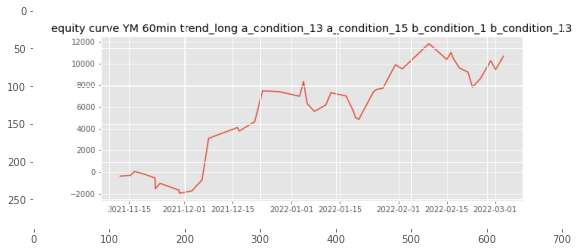

date
2021-11-12 10:00:00    -77.0
2021-11-15 11:00:00     15.0
2021-11-16 14:00:00     71.0
2021-11-19 04:00:00    -45.0
2021-11-22 12:00:00    -75.0
2021-11-22 15:00:00   -200.0
2021-11-23 23:00:00    101.0
2021-11-29 10:00:00   -124.0
2021-11-29 15:00:00    -59.0
2021-12-03 05:00:00     45.0
2021-12-06 03:00:00    201.0
2021-12-08 01:00:00    766.0
2021-12-16 09:00:00    199.0
2021-12-16 22:00:00    -64.0
2021-12-21 09:00:00    171.0
2021-12-23 16:00:00    570.0
2021-12-28 12:00:00    -16.0
2022-01-03 09:00:00    -84.0
2022-01-04 13:00:00    271.0
2022-01-04 20:00:00   -122.0
2022-01-05 14:00:00   -285.0
2022-01-07 16:00:00   -143.0
2022-01-11 00:00:00    119.0
2022-01-12 11:00:00    224.0
2022-01-16 20:00:00    -58.0
2022-01-18 23:00:00   -279.0
2022-01-19 14:00:00   -120.0
2022-01-20 13:00:00    -34.0
2022-01-24 19:00:00    511.0
2022-01-25 16:00:00     41.0
2022-01-27 13:00:00     24.0
2022-01-31 03:00:00    433.0
2022-02-02 03:00:00    -79.0
2022-02-09 20:00:00    466.0
2022-02-1

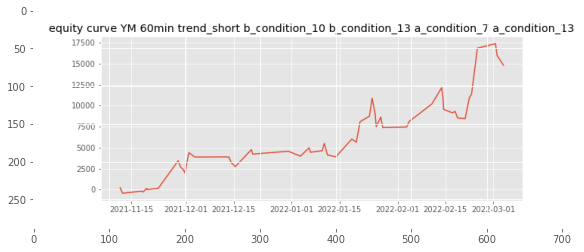

date
2021-11-11 18:00:00      47.0
2021-11-12 11:00:00    -133.0
2021-11-17 23:00:00      51.0
2021-11-18 12:00:00     -19.0
2021-11-19 12:00:00      84.0
2021-11-19 16:00:00     -29.0
2021-11-22 23:00:00      34.0
2021-11-28 18:00:00     654.0
2021-11-29 11:00:00    -149.0
2021-11-30 08:00:00     -76.0
2021-11-30 17:00:00     -65.0
2021-12-01 21:00:00     482.0
2021-12-03 15:00:00    -104.0
2021-12-13 14:00:00       2.0
2021-12-14 09:00:00    -149.0
2021-12-14 14:00:00      -7.0
2021-12-15 11:00:00     -76.0
2021-12-20 05:00:00     406.0
2021-12-20 13:00:00    -107.0
2021-12-31 00:00:00      68.0
2022-01-03 13:00:00    -118.0
2022-01-06 02:00:00     200.0
2022-01-06 12:00:00    -106.0
2022-01-09 22:00:00      37.0
2022-01-10 13:00:00     175.0
2022-01-11 11:00:00    -276.0
2022-01-13 23:00:00     -46.0
2022-01-14 15:00:00      65.0
2022-01-18 14:00:00     357.0
2022-01-19 22:00:00     -72.0
2022-01-21 00:00:00     484.0
2022-01-23 18:00:00     134.0
2022-01-24 13:00:00     429.0
2022-

In [23]:
# mostramos la informacion de cada una de las estrategias del df  (del backtest reciente)

portfolio = pd.DataFrame()
for i in range(1, len(best_strategies_selection) +1):
    # leemos y mostramos fig_name
    fig_name = best_strategies_selection.loc[i, 'fig_name']
    # en fig_name reemplazamos 'figures' por 'figures_short_bkt', porque habiamos renombrado la carpeta
    fig_name = fig_name.replace('figures', 'figures_short_bkt')
    print(fig_name)
    plt.figure()
    plt.imshow(plt.imread(v_path + fig_name))
    plt.show()

    #leemos los trades 

    trades_name = best_strategies_selection.loc[i, 'trades']
    # en trades_name reemplazamos 'trades' por 'trades_short_bkt', porque habiamos renombrado la carpeta
    trades_name = trades_name.replace('/trades/', '/trades_short_bkt/')
    trades = pd.read_pickle(v_path + trades_name)
    print(trades)
    # concatenamos cada uno de los trades en un df
    portfolio = pd.concat([portfolio, trades])

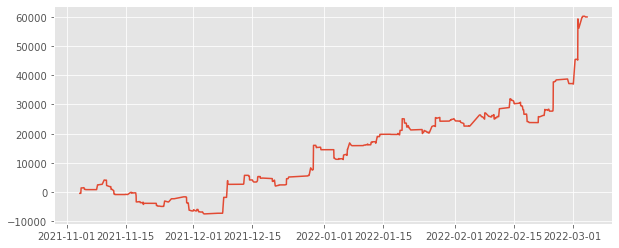

In [24]:
# nombramos portfolio.index como date
portfolio.index.name = 'date'
# y los agrupamos por fecha
portfolio = portfolio.groupby(['date']).sum()

plt.plot(portfolio.cumsum())

In [25]:
portfolio

,0
date,
2021-11-04 02:45:00,-380.000
2021-11-04 08:15:00,-0.066
2021-11-04 08:30:00,161.500
2021-11-04 10:15:00,1690.000
2021-11-04 17:15:00,2.750
...,...
2022-03-03 18:00:00,0.090
2022-03-03 20:00:00,-0.119
2022-03-03 20:30:00,8.600


In [26]:
# calculamos las metricas profit factor, sharpe ratio, net profit y bmo, usaremos portfolio_global_0 para calcular estas metricas, 
# para usar la funcion que teniamos definida
trades_pnl = portfolio.values
    # calculamos el numero de trades
num_trades = len(trades_pnl)
    # calculamos el bmo
bmo = trades_pnl.sum() / num_trades
    # calculamos el net profit
net_profit = trades_pnl.sum()

    # calculamos  gross profits and gross losses
gross_profits = trades_pnl[trades_pnl > 0].sum()
gross_losses = trades_pnl[trades_pnl < 0].sum()

    # calculamos el profit factor como  the ratio between gross profits and gross losses
profit_factor = gross_profits / abs(gross_losses)

    # calculamos el Sharpe ratio
sharpe_ratio = (net_profit / num_trades) / (trades_pnl.std() / np.sqrt(num_trades))

In [27]:
# mostramos las metricas
print('profit factor: ', profit_factor)
print('sharpe ratio: ', sharpe_ratio)
print('net profit: ', net_profit)
print('bmo: ', bmo)

profit factor:  1.8974339971083127
sharpe ratio:  2.3111744194319996
net profit:  59939.70999999987
bmo:  123.84237603305758
